In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
boston_data = pd.read_csv('/content/drive/My Drive/Datasets/BostonHousing.csv')
boston_data.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'prices']

boston_data= boston_data.drop(columns=['zn', 'chas'])
boston_data

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,prices
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
from sklearn import preprocessing
std = preprocessing.StandardScaler()
y = boston_data['prices']
bos = boston_data.drop(['prices'], axis=1)
bos = std.fit_transform(bos)
boston_data = pd.DataFrame(bos)
boston_data.columns = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']
boston_data

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


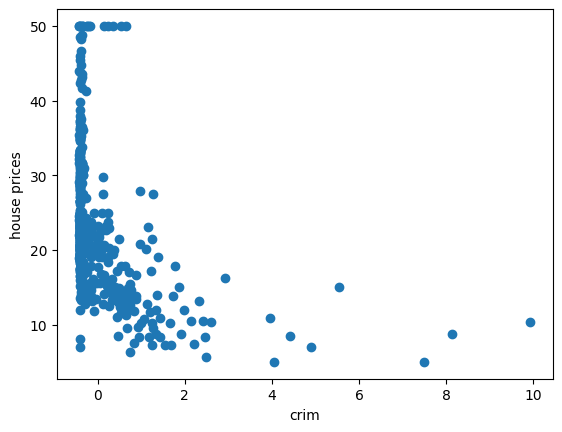

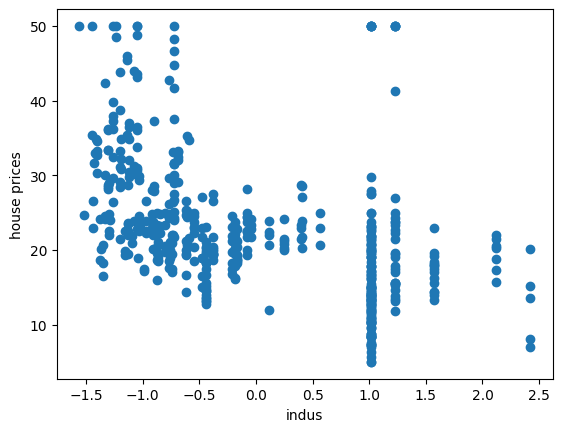

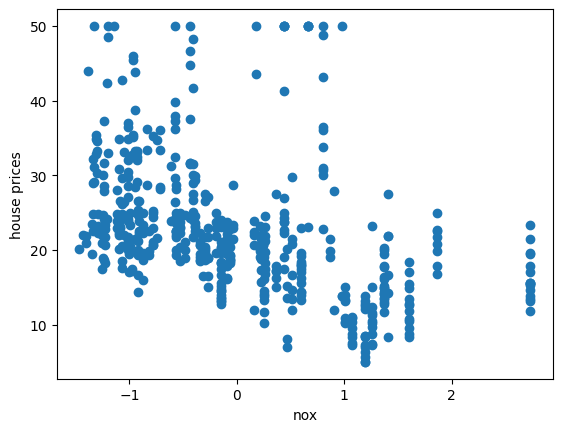

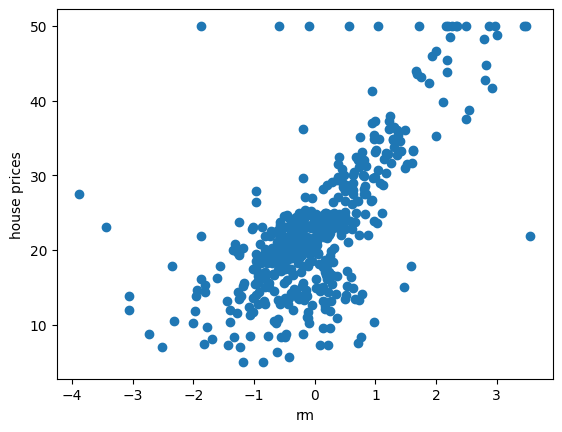

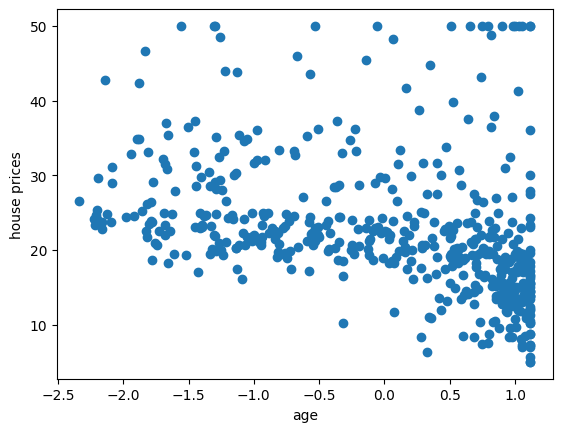

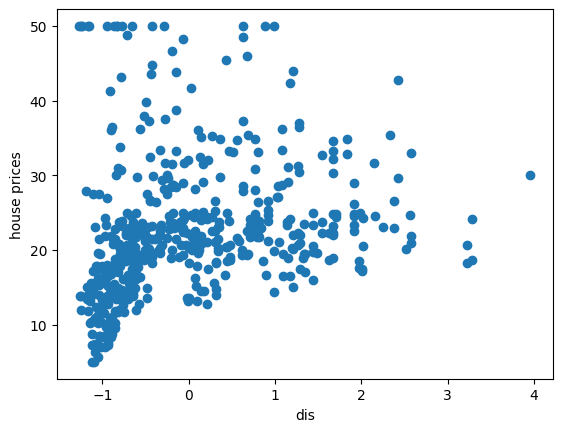

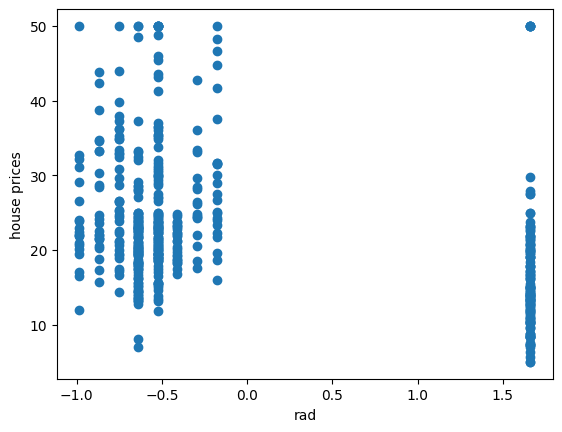

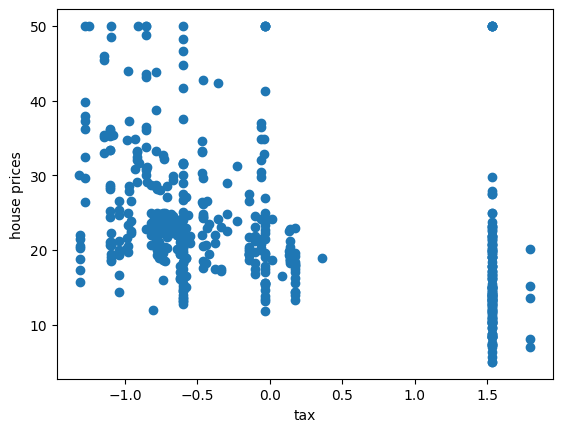

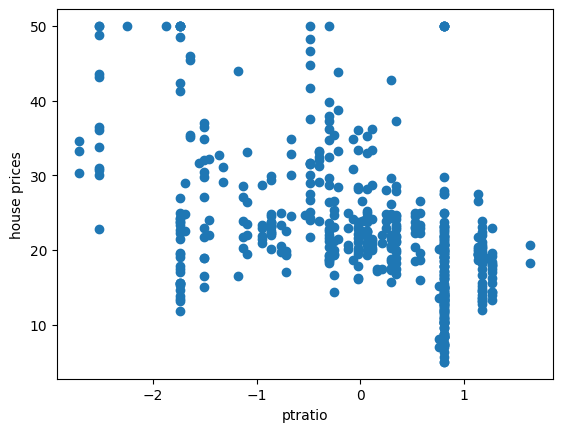

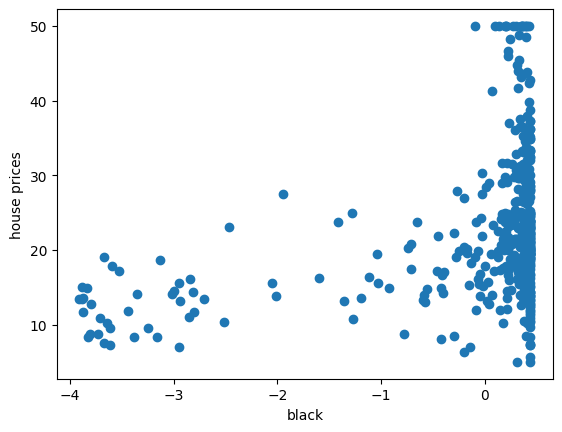

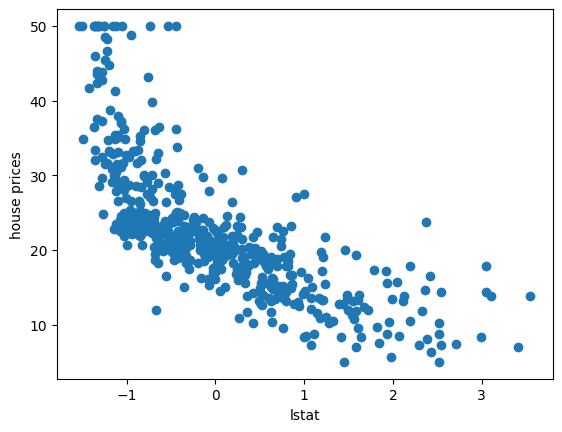

In [14]:
for i in boston_data.columns:
  plt.scatter(boston_data[i], y)
  plt.xlabel(i)
  plt.ylabel('house prices')
  plt.show()

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = boston_data
x = np.array(x)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=4)


regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
y_pred = regr.predict(test_x)
y_pred

array([13.04380203, 26.58908082, 18.14354941, 14.98090149, 38.02742123,
       26.40928589, 29.28396233, 20.25200971, 19.7936239 , 20.53646139,
       27.71677796, 28.04966415, 18.76821564, 29.8653345 , 22.12528572,
       15.63835273, 22.43175326, 11.63037935, 11.04834003, 13.62235679,
        5.75625404, 17.93484404, 20.28471752, 22.3215678 , 18.18245262,
       20.12704635, 14.73797948, 13.69873015, 21.30061784, 17.03735989,
       14.62357332, 22.44646308, 34.70293527, 21.84774727, 16.91782996,
       20.42831955, 31.4421657 , 36.80041888, 23.72178782, 25.52496087,
       35.60277464, 33.28763509, 19.40088491, 31.36009775, 30.81586421,
       23.50285395, 39.21337432, 19.16954415, 19.94251002, 24.4781966 ,
       30.60606159, 27.02069004, 18.32526662, 29.98919845, 12.89692124,
       23.77400081, 24.49201466, 32.6406851 , 16.54452766, 32.34965725,
       15.37136266, 18.97201329, 31.6714289 , 15.75058163, 39.74102447,
       25.97325579, 28.91108926, 10.16883726, 19.81759178, 22.67

In [27]:
regr.score(test_x, test_y)


0.7221157909282524

In [28]:
regr.score(train_x, train_y)

0.7284850173701609

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:',(metrics.mean_squared_error(test_y, y_pred)))

MAE: 3.3017093097451857
MSE: 25.812448636118003
RMSE: 25.812448636118003


Text(0, 0.5, 'Predicted Y')

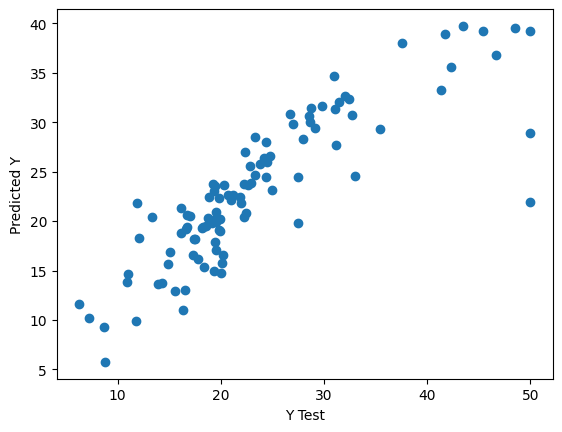

In [32]:
plt.scatter(test_y,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

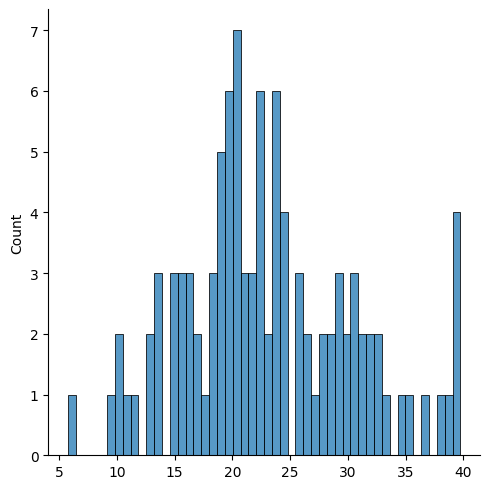

In [34]:
import seaborn as sns
sns.displot(y_pred,bins=50)
plt.show()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


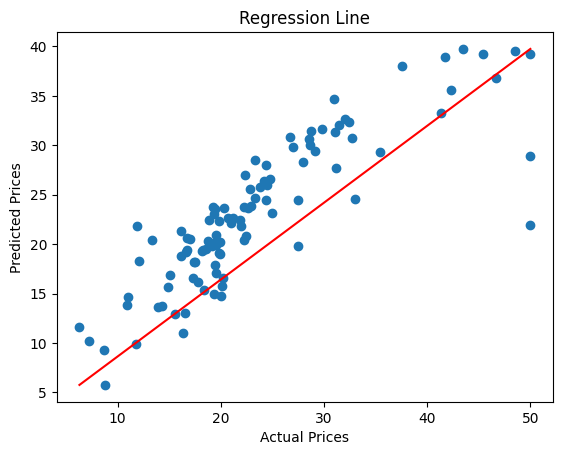

MAE: 3.3017093097451857
MSE: 25.812448636118003
RMSE: 25.812448636118003


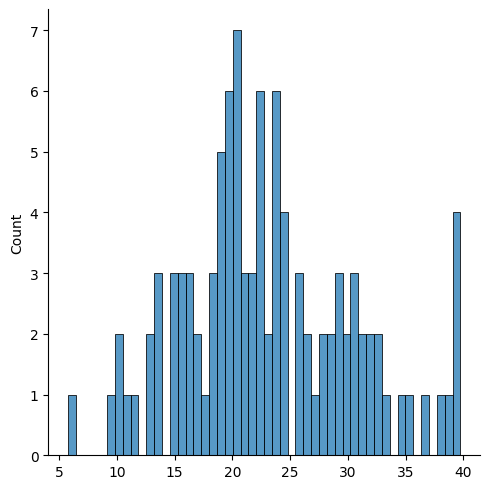

In [35]:
# prompt: i want to draw regresion line for this code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

drive.mount('/content/drive/')
boston_data = pd.read_csv('/content/drive/My Drive/Datasets/BostonHousing.csv')
boston_data.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'prices']

boston_data= boston_data.drop(columns=['zn', 'chas'])
std = preprocessing.StandardScaler()
y = boston_data['prices']
bos = boston_data.drop(['prices'], axis=1)
bos = std.fit_transform(bos)
boston_data = pd.DataFrame(bos)
boston_data.columns = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']

x = boston_data
x = np.array(x)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=4)

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
y_pred = regr.predict(test_x)

#Plot Regression Line
plt.scatter(test_y, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(test_y), max(test_y)], [min(y_pred), max(y_pred)], color='red') # Regression line
plt.title("Regression Line")
plt.show()

print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:',(metrics.mean_squared_error(test_y, y_pred)))
sns.displot(y_pred,bins=50)
plt.show()